In [15]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
digits = load_digits()
data = pd.DataFrame(digits.data)
labels = pd.Series(digits['target'])

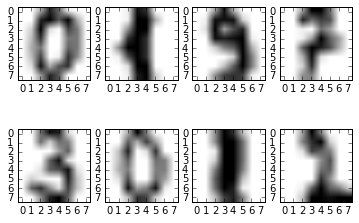

In [17]:
f, ax = plt.subplots(2, 4)
ax[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0,1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
ax[0,2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
ax[0,3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')
ax[1,0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
ax[1,1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
ax[1,2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
ax[1,3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

def train(nn, data, labels):
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(data, labels)
    return knn

def test(test_data, test_labels, knn):
    predictions = knn.predict(test_data)
    accuracy = sum(predictions == test_labels) / len(test_labels)
    return accuracy

def cross_validate(k):
    kf = KFold(n_splits=4)
    fold_accuracies = []
    for train_ind, test_ind in kf.split(data):
        train_data = data.loc[train_ind]
        train_labels = labels.loc[train_ind]
        test_data = data.loc[test_ind]
        test_labels = labels.loc[test_ind]
        model = train(k, train_data, train_labels)
        fold_accuracy = test(test_data, test_labels, model)
        fold_accuracies.append(fold_accuracy)
    return fold_accuracies

In [19]:
knn_one_accuracy = cross_validate(1)
np.mean(knn_one_accuracy)

0.9677233358079684

In [20]:
knn_accuracies = []
for i in range(1,10):
    accuracy = np.mean(cross_validate(i))
    knn_accuracies.append(accuracy)
print(knn_accuracies)

[0.9677233358079684, 0.9616010888393962, 0.9627183865379857, 0.9649480326651819, 0.9621665429349171, 0.9588270230141054, 0.9571591190299431, 0.9571578817124474, 0.9543801039346697]


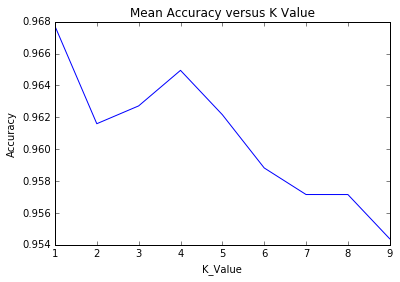

In [21]:
plt.plot(range(1,10), knn_accuracies)
plt.xlabel('K_Value')
plt.ylabel('Accuracy')
plt.title('Mean Accuracy versus K Value')

In [22]:
from sklearn.neural_network import MLPClassifier

def nn_train(nn_hidden_layers, train_data, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = nn_hidden_layers, max_iter=300)
    mlp.fit(train_data, train_labels)
    return mlp

def nn_test(mlp, test_data, test_labels):
    predictions = mlp.predict(test_data)
    accuracy = sum(predictions == test_labels) / len(test_labels)
    return accuracy

def nn_cross_validate(nn_hidden_layers):
    accuracies = []
    kf = KFold(n_splits=4)
    for train_index, test_index in kf.split(data):
        train_data = data.loc[train_index]
        train_labels = labels.loc[train_index]
        test_data = data.loc[test_index]
        test_labels = labels.loc[test_index]
        model = nn_train(nn_hidden_layers, train_data, train_labels)
        accuracy = nn_test(model, test_data, test_labels)
        accuracies.append(accuracy)
    return np.mean(accuracies)

nn_cross_validate(8)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.884232863152685

In [23]:
nn_one_layer_neuron = [8, 16]

nn_mean_accuracies = []
for i in nn_one_layer_neuron:
    nn_mean_accuracies.append(nn_cross_validate(i))
    
print(nn_mean_accuracies)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[0.8742254392477109, 0.9126280623608019]


In [24]:
nn_two_layer_neurons = [(8,8), (16,16)]

nn_two_layer_accuracies = []
for i in nn_two_layer_neurons:
    nn_two_layer_accuracies.append(nn_cross_validate(i))
    
print(nn_two_layer_accuracies)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[0.8870341499628804, 0.928207126948775]


In [25]:
nn_three_layer_neurons = [(8,8,8), (16,16,16)]

nn_three_layer_accuracies = []
for i in nn_three_layer_neurons:
    nn_three_layer_accuracies.append(nn_cross_validate(i))
    
print(nn_three_layer_accuracies)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[0.8653155159613957, 0.9304355357584756]
